# Project

In [69]:
# Import library to use operating system functions
import os

In [70]:
# Set workspace
for dirname, _, filenames in os.walk('/Users/macbookpro/Library/CloudStorage/GoogleDrive-erick.e.davila@gmail.com/My Drive/education/usac/master/2024 - trimestre 6/Prácticas'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/macbookpro/Library/CloudStorage/GoogleDrive-erick.e.davila@gmail.com/My Drive/education/usac/master/2024 - trimestre 6/Prácticas/.DS_Store
/Users/macbookpro/Library/CloudStorage/GoogleDrive-erick.e.davila@gmail.com/My Drive/education/usac/master/2024 - trimestre 6/Prácticas/Solicitud de Inicio de Práctica - Erick Dávila.docx
/Users/macbookpro/Library/CloudStorage/GoogleDrive-erick.e.davila@gmail.com/My Drive/education/usac/master/2024 - trimestre 6/Prácticas/Informe de Avance 150 horas.docx
/Users/macbookpro/Library/CloudStorage/GoogleDrive-erick.e.davila@gmail.com/My Drive/education/usac/master/2024 - trimestre 6/Prácticas/ALCANCE ESCANEADO PRACTICANTE ERICK DAVILA 2024.pdf
/Users/macbookpro/Library/CloudStorage/GoogleDrive-erick.e.davila@gmail.com/My Drive/education/usac/master/2024 - trimestre 6/Prácticas/Solicitud de Inicio de Práctica - Erick Dávila Test.docx
/Users/macbookpro/Library/CloudStorage/GoogleDrive-erick.e.davila@gmail.com/My Drive/education/usac/master/

In [71]:
# Import library to manage files
import pandas as pd

In [72]:
# Cargar el dataset
data = pd.read_csv('UCI_Credit_Card.csv')

data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [76]:
# Select variables for forecasting
forecast_columns = ['LIMIT_BAL', 'AGE', 'SEX', 'EDUCATION', 'MARRIAGE', 
                    'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

data_forecast = data[forecast_columns]

# Replace null data with mean values
data_forecast.fillna(data_forecast.mean(), inplace=True)

data_forecast.head()

/var/folders/1l/1176zbkd1hd_ksjsrk705xxc0000gn/T/ipykernel_12964/1812380296.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_forecast.fillna(data_forecast.mean(), inplace=True)


,LIMIT_BAL,AGE,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,24,2,2,1,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,26,2,2,2,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,34,2,2,2,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,37,2,2,1,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,57,1,2,1,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [77]:
# Replace null data with mean values
data_forecast.fillna(data_forecast.mean(), inplace=True)

data_forecast.head()

/var/folders/1l/1176zbkd1hd_ksjsrk705xxc0000gn/T/ipykernel_12964/2534559753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_forecast.fillna(data_forecast.mean(), inplace=True)


,LIMIT_BAL,AGE,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,24,2,2,1,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,26,2,2,2,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,34,2,2,2,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,37,2,2,1,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,57,1,2,1,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [78]:
# Create lag variables for billing
for i in range(1, 7):
    data_forecast[f'BILL_AMT_lag_{i}'] = data_forecast['BILL_AMT1'].shift(i)
    data_forecast[f'PAY_AMT_lag_{i}'] = data_forecast['PAY_AMT1'].shift(i)

# Delete rows with null values (cause of lags)
data_forecast.dropna(inplace=True)

data_forecast.head()

/var/folders/1l/1176zbkd1hd_ksjsrk705xxc0000gn/T/ipykernel_12964/3256186359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_forecast[f'BILL_AMT_lag_{i}'] = data_forecast['BILL_AMT1'].shift(i)


,LIMIT_BAL,AGE,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT_lag_2,PAY_AMT_lag_2,BILL_AMT_lag_3,PAY_AMT_lag_3,BILL_AMT_lag_4,PAY_AMT_lag_4,BILL_AMT_lag_5,PAY_AMT_lag_5,BILL_AMT_lag_6,PAY_AMT_lag_6
6,500000.0,29,1,1,2,0,0,0,0,0,...,8617.0,2000.0,46990.0,2000.0,29239.0,1518.0,2682.0,0.0,3913.0,0.0
7,100000.0,23,2,2,2,0,-1,-1,0,0,...,64400.0,2500.0,8617.0,2000.0,46990.0,2000.0,29239.0,1518.0,2682.0,0.0
8,140000.0,28,2,3,1,0,0,2,0,0,...,367965.0,55000.0,64400.0,2500.0,8617.0,2000.0,46990.0,2000.0,29239.0,1518.0
9,20000.0,35,1,3,2,-2,-2,-2,-2,-1,...,11876.0,380.0,367965.0,55000.0,64400.0,2500.0,8617.0,2000.0,46990.0,2000.0
10,200000.0,34,2,3,2,0,0,2,0,0,...,11285.0,3329.0,11876.0,380.0,367965.0,55000.0,64400.0,2500.0,8617.0,2000.0


In [79]:
# Import library to split dataset
from sklearn.model_selection import train_test_split

In [80]:
# Split dataset
X = data_forecast.drop(columns=['BILL_AMT1'])  # Usamos todo excepto la factura actual como predictores
y = data_forecast['BILL_AMT1']  # Variable objetivo

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [81]:
# Import library to use lineal regression model
import xgboost as xgb

In [82]:
# Start and train XGBoost model
model_forecast = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model_forecast.fit(X_train, y_train)

# Prediction and testing
y_pred_forecast = model_forecast.predict(X_val)

In [83]:
# Import libraries to get metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [84]:
mae = mean_absolute_error(y_val, y_pred_forecast)
mse = mean_squared_error(y_val, y_pred_forecast)
r2 = r2_score(y_val, y_pred_forecast)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

MAE: 8928.312949550074
MSE: 522712953.05372113
R²: 0.9111008432227837


In [85]:
# Prediction with test data
y_pred_test = model_forecast.predict(X_test)

In [86]:
y_pred_test

array([43727.492 , 78233.36  ,  1270.5736, ..., 49465.61  , 12278.739 ,
       12062.499 ], dtype=float32)

In [87]:
for n in y_pred_test:
    print(n)

43727.492
78233.36
1270.5736
102949.914
3345.999
71418.93
102835.9
-4474.11
24601.443
-1076.4443
44766.79
190903.3
198166.27
247.06964
36048.355
51308.14
-401.2658
14794.665
-2565.6816
1674.2039
221362.05
568.2141
26328.951
25963.045
13442.365
131537.5
49309.062
40212.05
134133.28
20767.78
52795.188
33217.195
29267.016
50691.93
296.2048
-1704.5565
38237.805
14028.987
25078.59
5067.425
62430.707
20372.879
10428.821
13244.185
44768.215
1772.001
1235.0261
8481.896
5859.986
49222.496
82498.516
176391.69
51050.996
19934.678
28906.326
29069.201
1922.9858
66930.84
10298.1
11838.889
32569.2
2349.814
18826.215
95448.516
49395.12
14340.426
44276.965
64597.945
6927.6855
38533.703
15903.358
30584.125
71023.41
-718.0611
27023.799
25168.326
23542.428
16731.695
13665.909
3561.718
5541.6064
2014.5088
37956.234
14871.646
21390.322
226373.73
35053.78
1831.563
27282.996
137806.33
12733.4795
72611.83
44381.67
33927.652
752.2773
28177.39
15402.28
20621.441
12440.764
102636.89
8425.324
1533.0277
11581.036
1

In [88]:
# Import libraries to create charts and get metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

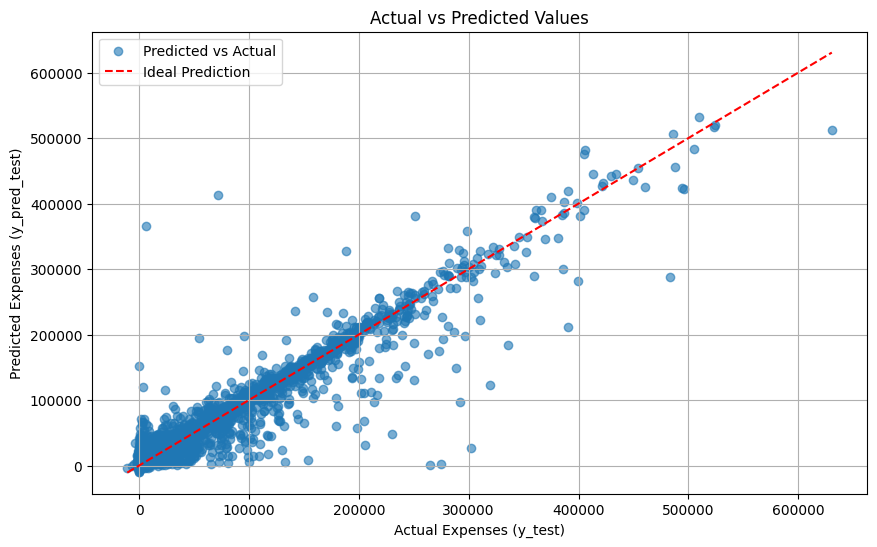

In [89]:
# Scatter plot comparing actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Ideal Prediction")
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Expenses (y_test)")
plt.ylabel("Predicted Expenses (y_pred_test)")
plt.legend()
plt.grid()
plt.show()

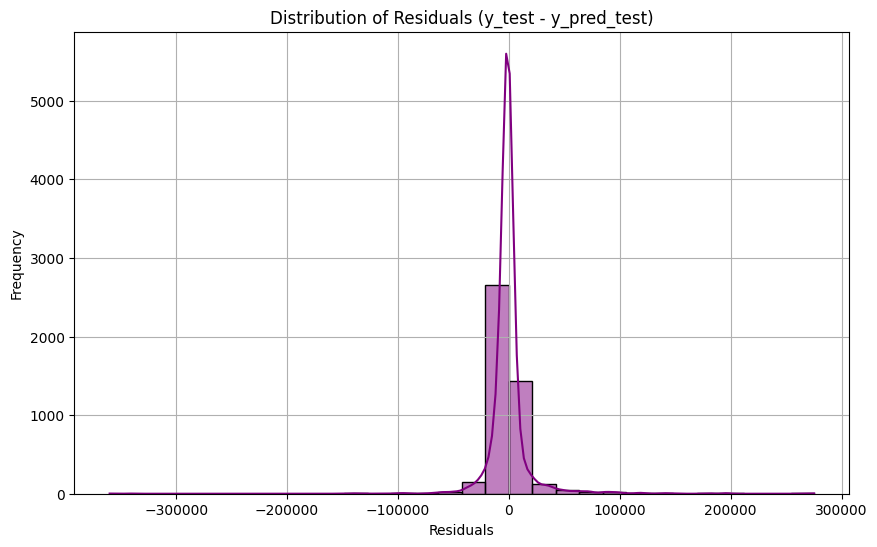

In [90]:
# Residuals distribution plot
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color="purple", bins=30)
plt.title("Distribution of Residuals (y_test - y_pred_test)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid()
plt.show()

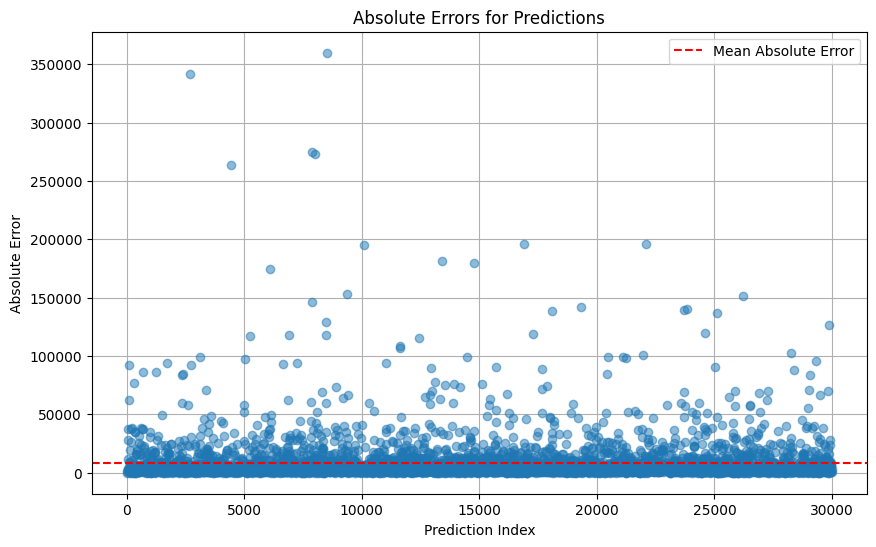

In [91]:
# Error trend (Absolute Error per Prediction)
absolute_errors = np.abs(residuals)
plt.figure(figsize=(10, 6))
plt.plot(absolute_errors, marker="o", linestyle="", alpha=0.5)
plt.axhline(y=np.mean(absolute_errors), color="red", linestyle="--", label="Mean Absolute Error")
plt.title("Absolute Errors for Predictions")
plt.xlabel("Prediction Index")
plt.ylabel("Absolute Error")
plt.legend()
plt.grid()
plt.show()